# RUN PERFORMANCE PROJECT - Pau Sampietro  

## *Predicting future races:* DEEP LEARNING APPROACH

Intro
* 
* 

In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from rpdb import read_table, read_table_sql, export_table

Using TensorFlow backend.


In [5]:
moves = read_table('moves_feat')
moves.drop(columns='index', inplace=True)
moves.head()

,distance,accum_ascent,ascent_ratio,calories,heart_rate,days_from,moving_time
0,4019.0,280.0,69.7,670.0,166.0,659,29.8
1,4995.0,63.0,12.6,585.0,168.0,659,30.9
2,4374.0,115.0,26.3,602.0,180.0,642,22.6
3,3005.0,91.0,30.3,365.0,167.0,641,16.9
4,6540.0,241.0,36.9,760.0,161.0,637,42.0


In [74]:
X = moves[['distance', 'accum_ascent', 'ascent_ratio']]
y = moves['moving_time']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

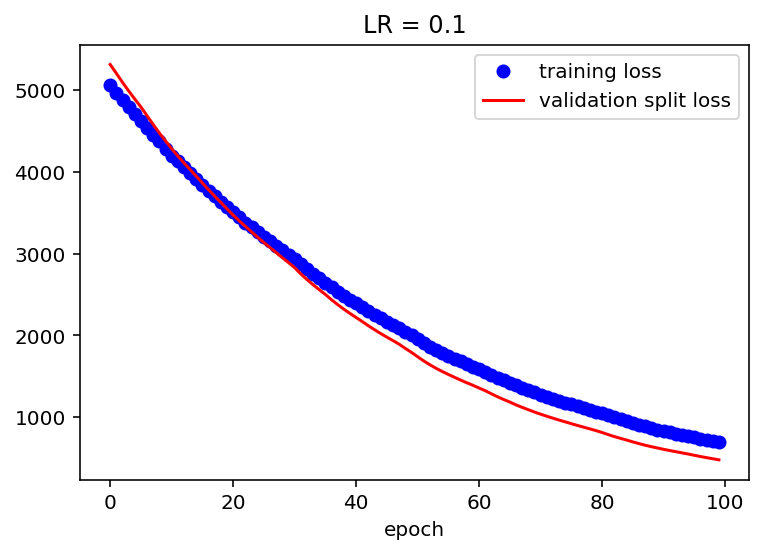

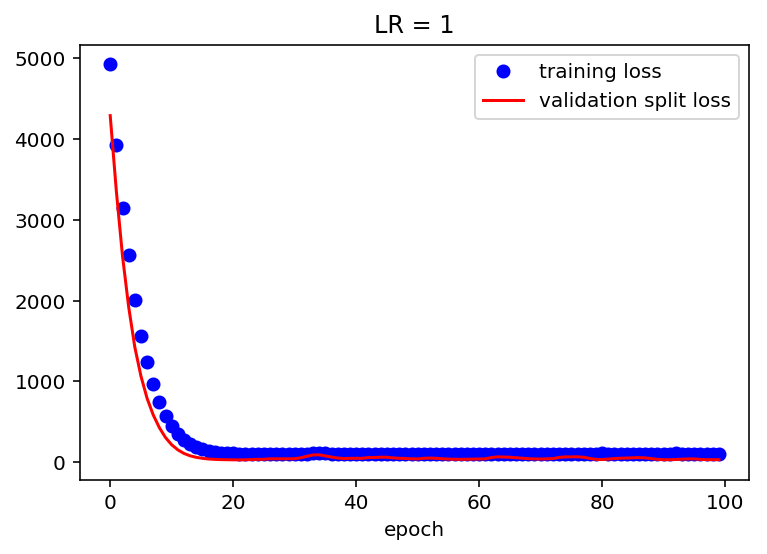

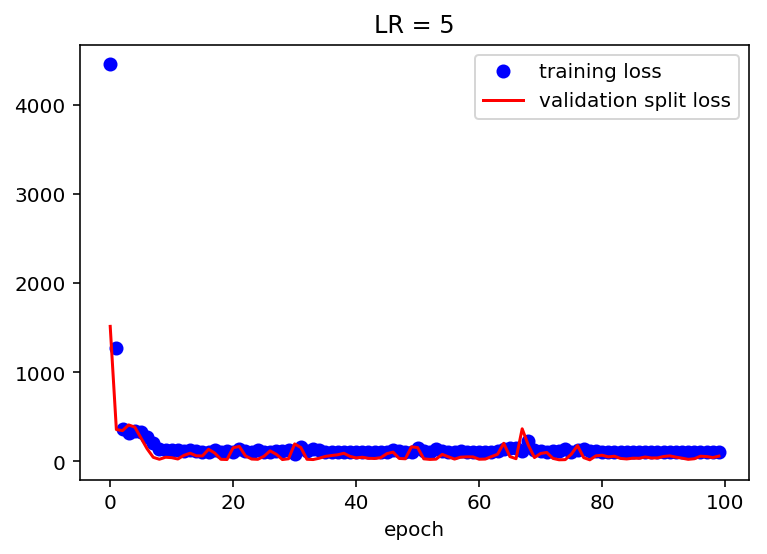

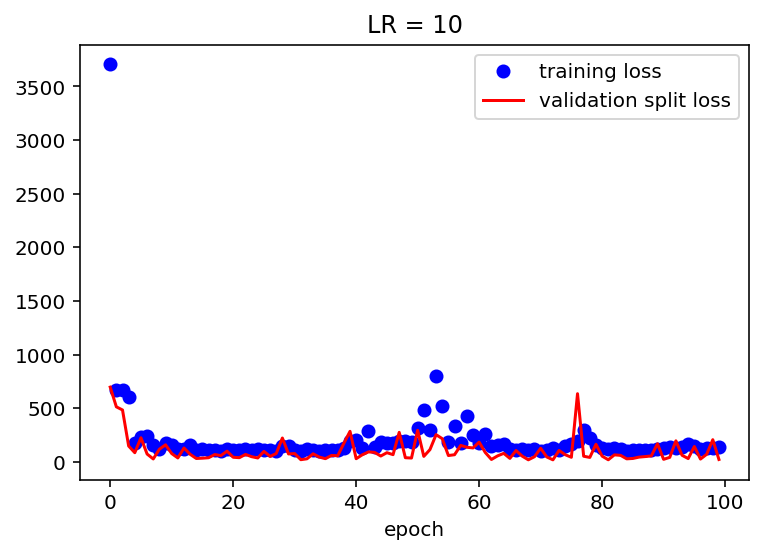

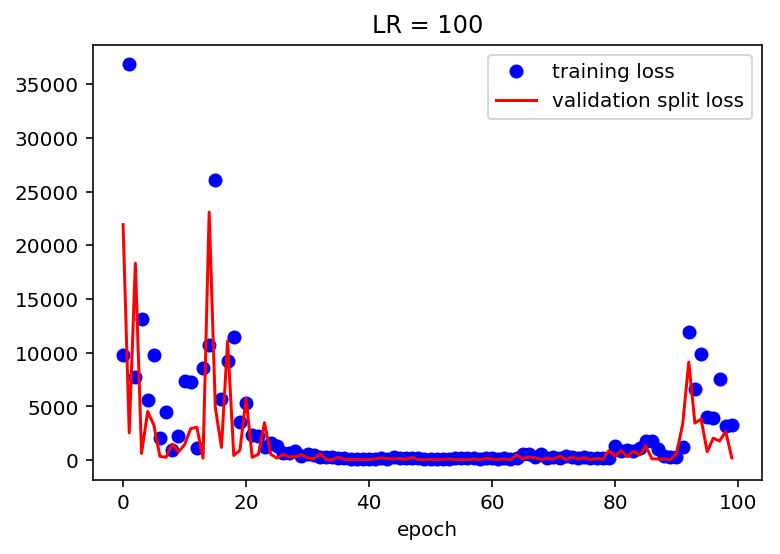

In [77]:
LR = [0.1, 1, 5, 10, 100]

for i in LR:
    # linear regression (NO HIDDEN LAYERS) model: Shape input: accum_ascent and distance, output movin_time
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    # compiling model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    # fitting model
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.1, verbose = 0)
    history_dict=history.history
    
    # plotting model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.title(f'LR = {i}')
    plt.xlabel('epoch')
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='validation split loss')
    plt.legend()

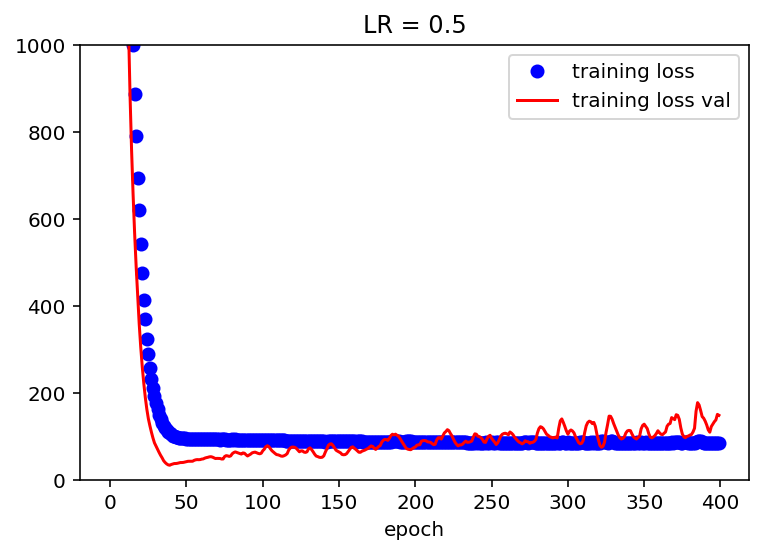

In [83]:
lr = 0.5
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(Adam(lr=lr), 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 400, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.title(f'LR = {lr}')
plt.xlabel('epoch')
plt.ylim((0,1000))
plt.legend()
plt.show()

In [84]:
# Runs model 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.961
The R2 score on the Test set is:	0.722


(0, 500)

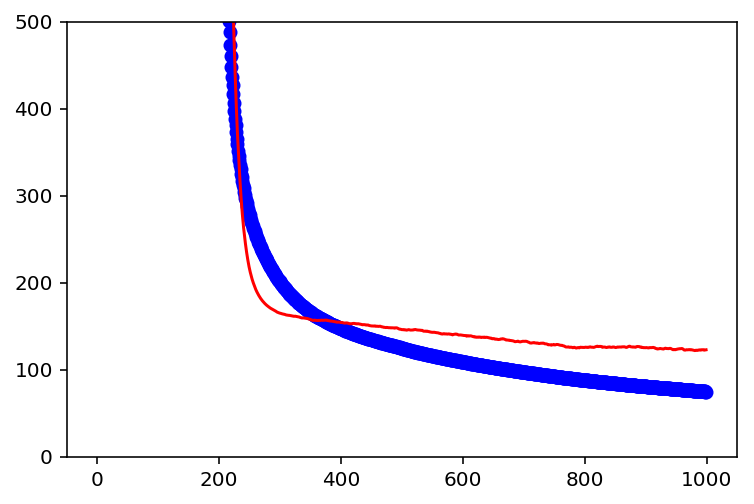

In [90]:

# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.0003), 'mean_squared_error')

# Runs model for 1000 iterations and assigns this to 'history'
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2, verbose = 0)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.ylim(0,500)

In [91]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.964
The R2 score on the Test set is:	0.792


Epoch 00341: early stopping


(0, 700)

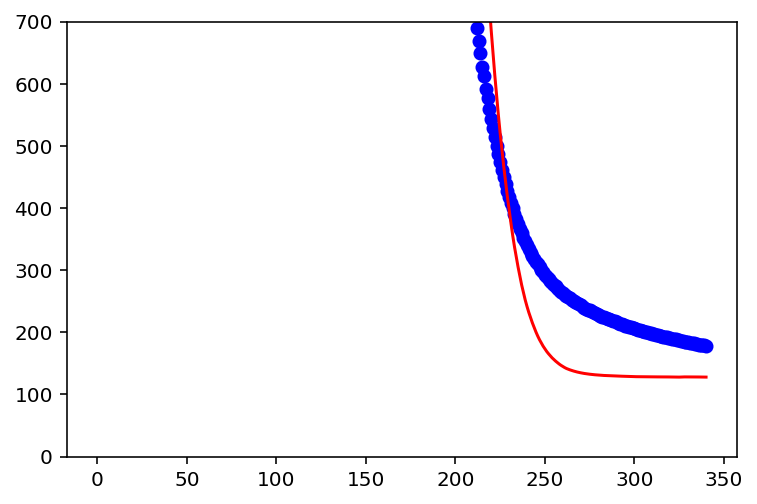

In [95]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.0003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 1000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.ylim(0,700)

In [96]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.928
The R2 score on the Test set is:	0.711


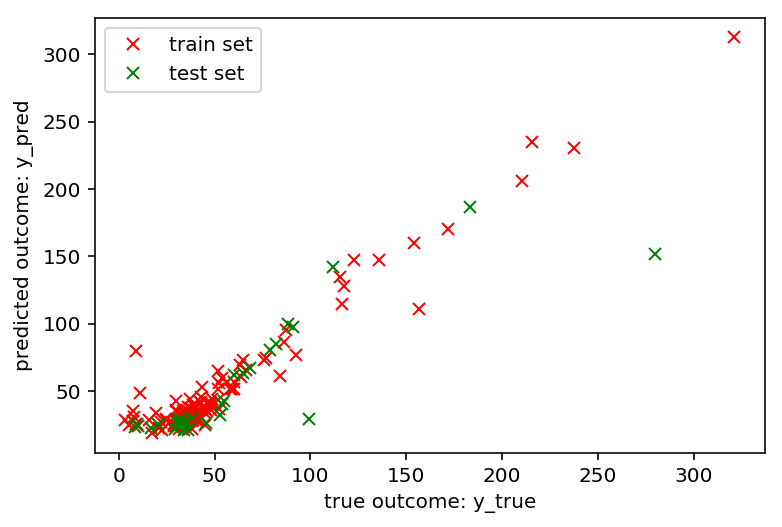

In [111]:
plt.plot(y_train, y_train_pred, 'xr', label='train set')
plt.plot(y_test, y_test_pred, 'xg', label = 'test set')
plt.xlabel('true outcome: y_true')
plt.ylabel('predicted outcome: y_pred')
plt.legend()